In [152]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_utils_g1 as du
plt.style.use('seaborn')

path = du.open_file_general()
# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 20)


In [45]:
data.describe()

,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19237.0000,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,9618.0000,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,5553.3879,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,0.0000,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4809.0000,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,9618.0000,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,14427.0000,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.0000,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


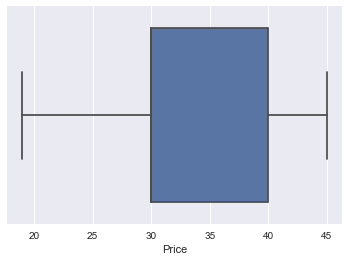

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

In [89]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)    
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#datacolumn = data["Price"]

#up, down = outlier_treatment(datacolumn)
#print(up)
#print(down)

In [86]:
outlier_free_list=0
filtered_data=0

lower_range = 0
upper_range = 0

# Removing the outliers
def removeOutliers(data, col):
    sorted(data)
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    global lower_range
    global upper_range
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return upper_range,lower_range

#removeOutliers(data, 'Price')

# Assigning filtered data back to our original variable
#data = filtered_data
#print("Shape of data after outlier removal is: ", data.shape)
#print("Lower Range ", lower_range)
#print("Upper Range ", lower_range)

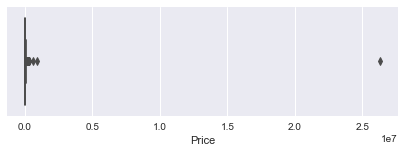

In [174]:
plt.figure(figsize=(7,2))
sns.boxplot(x=data['Price'])
plt.show()


192


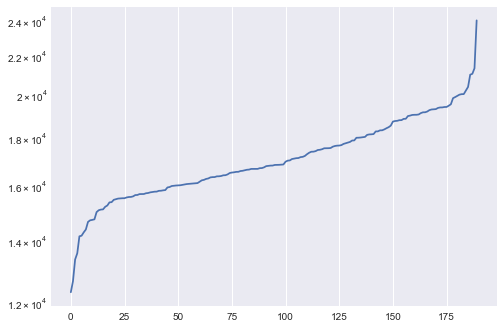

In [140]:
import math

n = 100
a = len(data)
b = int(len(data)/n)
res = []
for i in range(b):
    x=0
    temp = n if a >= i*n+n else a-i*n
    for j in range(temp):
        x+= data.iloc[n*i+j]['Price']
    res.append(int(x/temp))
res.sort()

fig, ax = plt.subplots()
ax.set_yscale('log')

ax.plot(res[:-2])
print(b)



In [141]:
#datacolumn = data["Price"]

up, down = outlier_treatment(res)
print(up)
print(down)

-3066.300000000012
40624.18000000002


(array([2.6004226e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.3614778e-07]),
 array([ 12350.,  50605.,  88860., 127115., 165370., 203625., 241880.,
        280135.]),
 [<matplotlib.patches.Polygon at 0x1e7ce70cc10>])

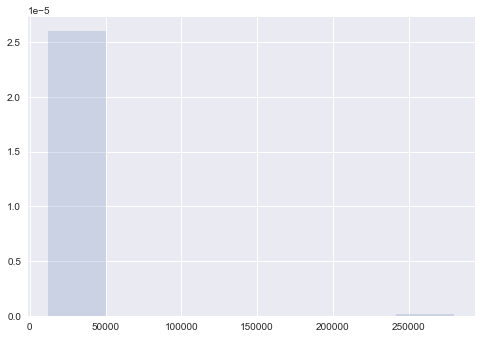

In [144]:
plt.hist(res, bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

In [145]:
data
cat = data.Model.unique()
print(len(cat))

1481


In [9]:
#data.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/IQRSanitized.csv',index=False,line_terminator='\n')

In [10]:
#data2 = pd.read_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/IQRSanitized.csv')

In [146]:
thing = data2.Manufacturer.unique()
len(thing)

66

In [147]:
data2 = data
data_types = {}
data_types['Price'] = 'int32'
data2 = data.astype(data_types)
categoryarray = data2.Model.unique()
pricemeanarray = []
pricesdarray = []
for x in categoryarray:
    comm = "Model == '"+x+"'"
    df2 = data2.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))

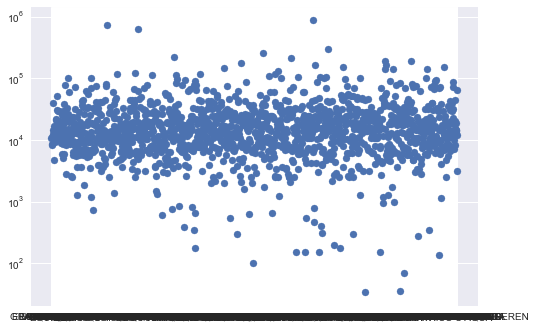

In [148]:
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

In [149]:
npArray = np.array(pricemeanarray)
print(npArray.min())
print(npArray.max())

34.0
872946.0


In [150]:
small = (npArray-npArray.min())/npArray.max()

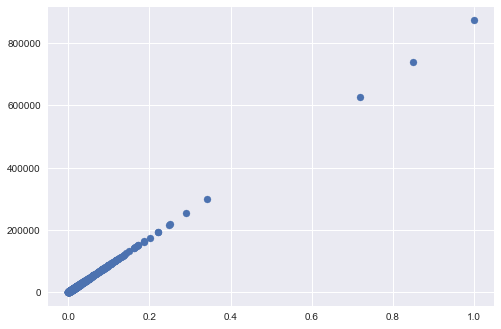

In [151]:
fig, ax = plt.subplots()
ax.scatter(small,pricemeanarray)

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

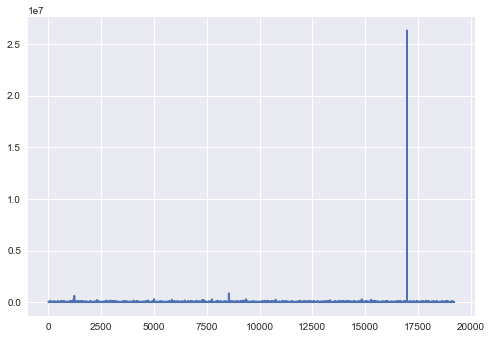

In [70]:
dataprice = data['Price']

sorted(dataprice)


fig, ax = plt.subplots()
ax.plot(dataprice[:-10])
dataprice

In [170]:
# This is a quantile based capping and flooring method
# This simple method seems to be the best out of all of our other attempts


def removeOutliers2(data, col):
    sorted(data)
    Q3 = np.quantile(data[col], 0.99985)
    Q1 = np.quantile(data[col], 0.00015)
    
    lower_range = Q1
    upper_range = Q3
    filtered_data = 0
    
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data[col].loc[data[col].isin(outlier_free_list)]
    return Q3, Q1, filtered_data



up,down, filtered_data = removeOutliers2(data,"Price")
print(up)
print(f'{down:.1f}')

npFiltered = np.array(filtered_data)

345384.784400252
3.0


308906

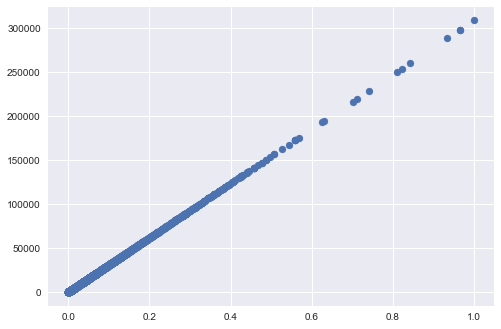

In [172]:
small = (npFiltered-npFiltered.min())/npFiltered.max()
fig, ax = plt.subplots()
ax.scatter(small,npFiltered)

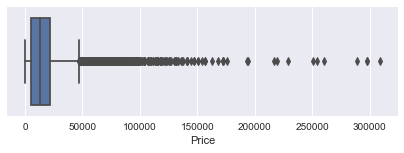

In [175]:
plt.figure(figsize=(7,2))
sns.boxplot(x=filtered_data)
plt.show()

In [ ]:
dffinal = pd.DataFrame({'y':small, 'x':})